<a href="https://colab.research.google.com/github/labib899/CSE-837-ML/blob/main/hw4/linear-regression-exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚘 💵 HW4 Lab: Used cars and linear regression

<img src="https://github.com/joshuagrossman/mse125-labs-public/blob/main/hw4/img/cars.jpeg?raw=1" alt= “cars” width="500" />

## ✅ Setup and data import
In this lab, we'll explore correlation, simple regression, multiple regression, and confidence intervals with used car data from [Edmunds.com](https://edmunds.com). Our goal will be to predict the price of used cars using the features of each car.

In [1]:
# Load in additional functions
library(tidyverse)
library(lubridate)

# Use three digits past the decimal point
# Don't use scientific notation
options(digits = 3, scipen=999)

# Format plots with a white background and dark features.
theme_set(theme_bw())

# Increase the default text size of plots.
# If you are *not* working in Google Colab, we recommend commenting
# out this line of code.
theme_update(text = element_text(size = 20))

# Increase the default plot width and height.
# If you are *not* working in Google Colab, we recommend commenting
# out this line of code.
options(repr.plot.width=12, repr.plot.height=8)

cars = read_tsv("https://jdgrossman.com/assets/used-cars.tsv")

# peek at 10 random rows
sample_n(cars, 10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 1286 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): type, make, model, trim
dbl (3): year, mileage, price

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


type,year,make,model,trim,mileage,price
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
USED,2011,Infiniti,G Sedan,G25 Journey,31860,20998
USED,2012,Honda,Civic,EX-L,27040,17998
USED,2009,BMW,3 Series,335i,76595,22888
USED,2008,Acura,MDX,Base,98997,19695
USED,2011,Cadillac,CTS,Luxury,60147,21895
USED,2011,Honda,Accord,EX-L V-6,50385,16700
USED,2013,Infiniti,G Sedan,G37 Journey,24468,25998
USED,2012,Volkswagen,Jetta,SE PZEV,22550,15888
USED,2006,Acura,MDX,Touring,90737,13981


## 🚀 Exercise 1

Create a new dataset called `accords`. The dataset should only include rows corresponding to used Honda Accords.

Using the `accords` data and the `lm` function, fit the following linear regression model:

$$ y_{\text{price,}i} = \beta_0 + \beta_1 x_{\text{mileage},i} + \epsilon_i, $$

where $\epsilon_i \sim N(0, \sigma^2)$.

Print your regression output with the `summary` function. Using your output, identify and interpret the following quantities in no more than one sentence each:

- $\hat{\beta}_0$
- $\hat{\beta}_1$
- $\text{se}({\hat{\beta}_0})$,
- $\text{se}({\hat{\beta}_1})$,
- $\hat{\sigma}$
- $\text{R}^2$

Note: You should not report more precision than is necessary. For example, if your model returns a coefficient of 1.123456, it's sufficient (and desirable) to report 1.1 or 1.12 as the coefficient.

In [13]:
accords = cars |>
  filter(make == "Honda", model == "Accord")

model_accords = lm(price ~ mileage, data = accords)
summary(model_accords)


Call:
lm(formula = price ~ mileage, data = accords)

Residuals:
   Min     1Q Median     3Q    Max 
 -7528  -1330    -68   1226   7989 

Coefficients:
              Estimate Std. Error t value            Pr(>|t|)    
(Intercept) 20675.6746   399.4744    51.8 <0.0000000000000002 ***
mileage        -0.0878     0.0047   -18.7 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2420 on 120 degrees of freedom
Multiple R-squared:  0.744,	Adjusted R-squared:  0.742 
F-statistic:  349 on 1 and 120 DF,  p-value: <0.0000000000000002



---

The value of $\hat{\beta}_0$ with units: 20675.675

Interpretation: The estimated price of a Honda Accord with zero miles is about $20,675.675.

---

The value of $\hat{\beta}_1$ with units: -0.088

Interpretation: Each additional mile is associated with a decrease of about $0.088 in price.

---

The value of $\text{se}({\hat{\beta}_0})$ with units: 399.474

Interpretation: The standard error of the intercept is about $399.474, indicating moderate uncertainty around the baseline price.

---

The value of $\text{se}({\hat{\beta}_1})$ with units: 0.005

Interpretation: The standard error of the mileage coefficient is about 0.005, showing that the effect of mileage is estimated very precisely.

---

The value of $\hat{\sigma}$ with units: 2420

Interpretation: The residual standard error is about $2420, meaning actual prices typically vary about $2.4k from the regression line.

---

The value of $\text{R}^2$ with units: 0.742

Interpretation: The model explains about 74% of the variation in used Honda Accord prices.

---

## 🚀 Exercise 2

Using the `predict` function and the model from the previous exercise, predict the average price of a used Honda Accord with an odometer reading of 50,000 miles. Provide a normally-approximated confidence interval for this mean.

In [14]:
new_data <- data.frame(mileage = 50000)

predict(model_accords,
        newdata = new_data,
        interval = "confidence",
        level = 0.95)



,fit,lwr,upr
1,16285,15809,16761


## 🚀 Exercise 3

Repeat Exercise 2 for a used Honda Accord with an odometer reading of 300,000 miles.

Using this result, can you identify a critical issue with your regression model? Answer in one or two sentences.

In [15]:
new_data <- data.frame(mileage = 300000)

predict(model_accords,
        newdata = new_data,
        interval = "confidence",
        level = 0.95)

,fit,lwr,upr
1,-5667,-7842,-3492


---

Write your answer to Exercise 3 here.

---
ans: The model extrapolates far beyond the range of realistic or observed mileage values and produces impossible negative prices, showing that the assumed linear relationship breaks down at high mileage. In reality, price cannot fall below zero, so the linear model is not appropriate for extreme mileage values.

## 🚀 Exercise 4

Graphically present your regression model from Exercise 1. Specifically, plot the data with
a scatter plot, and include a regression line with the corresponding confidence bands.

- Note that this can be achieved in R using
`geom_smooth` function from `ggplot2`.

- Make sure to adjust the limits of your plot so you can see the issue you identified in the previous problem.

- Format your plot nicely!

`geom_smooth()` using formula = 'y ~ x'


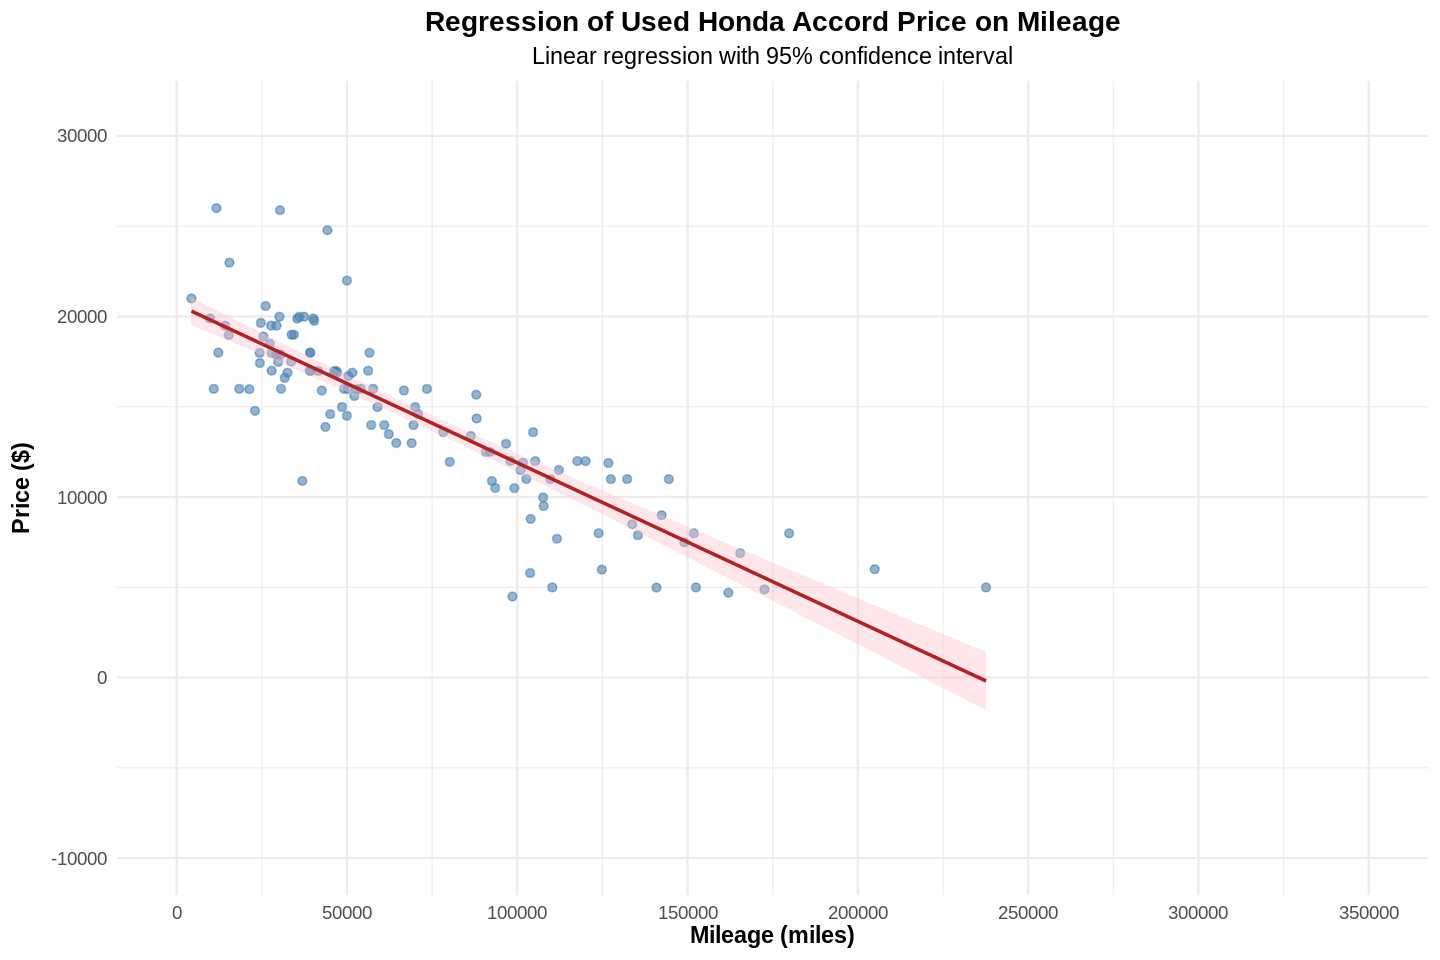

In [20]:
library(ggplot2)

ggplot(accords, aes(x = mileage, y = price)) +
  geom_point(color = "steelblue", alpha = 0.6, size = 2) +  # scatter plot
  geom_smooth(method = "lm", se = TRUE, color = "firebrick", fill = "pink", lwd = 1) +
  scale_x_continuous(limits = c(0, 350000), breaks = seq(0, 350000, 50000)) +
  scale_y_continuous(limits = c(-10000, max(accords$price) + 5000)) +
  labs(
    title = "Regression of Used Honda Accord Price on Mileage",
    subtitle = "Linear regression with 95% confidence interval",
    x = "Mileage (miles)",
    y = "Price ($)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5),
    axis.title = element_text(face = "bold")
  )

## 🚀 Exercise 5

Address the issue illustrated in Exercises 3 and 4 by refitting your model with a log-transformed outcome.

Use your new model to predict the price (in dollars) of a Honda Accord with a mileage of 50,000 and a mileage of 300,000. **Print the new predicted prices.**

In [19]:
model_log <- lm(log(price) ~ mileage, data = accords)
summary(model_log)

new_mileage <- data.frame(mileage = c(50000, 300000))

pred_log <- predict(model_log, newdata = new_mileage, interval = "confidence")
pred_price <- exp(pred_log)

pred_price


Call:
lm(formula = log(price) ~ mileage, data = accords)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8967 -0.0630  0.0242  0.1038  0.4111 

Coefficients:
               Estimate  Std. Error t value            Pr(>|t|)    
(Intercept) 10.03250583  0.03315092   302.6 <0.0000000000000002 ***
mileage     -0.00000736  0.00000039   -18.9 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.201 on 120 degrees of freedom
Multiple R-squared:  0.748,	Adjusted R-squared:  0.746 
F-statistic:  356 on 1 and 120 DF,  p-value: <0.0000000000000002


,fit,lwr,upr
1,15746,15136,16380
2,2499,2086,2993


## 🚀 Exercise 6

Graphically present your regression model from Exercise 5. Specifically, plot the data with
a scatter plot, and include a regression line with the corresponding confidence bands.

- Make sure to adjust the limits of your plot so you can see that the issue you identified earlier is now fixed.

- Format your plot nicely!

- Note that the new model can be plotted in R using the `geom_smooth` function with the following arguments:

`geom_smooth(method = "glm", formula = y~x, method.args = list(family = gaussian(link = 'log')))`

> Note: `geom_smooth(method='lm', formula=log(y)~x)` will also plot the correct model (with much prettier and clearer syntax!). However, it puts the model on a logarithmic y-scale instead of a standard numeric scale.
>
> Alternatively, you could use `geom_line()` with a dataset consisting of many possible mileage values (e.g., 0 through 350,000) along with the corresponding predictions  from your new model.

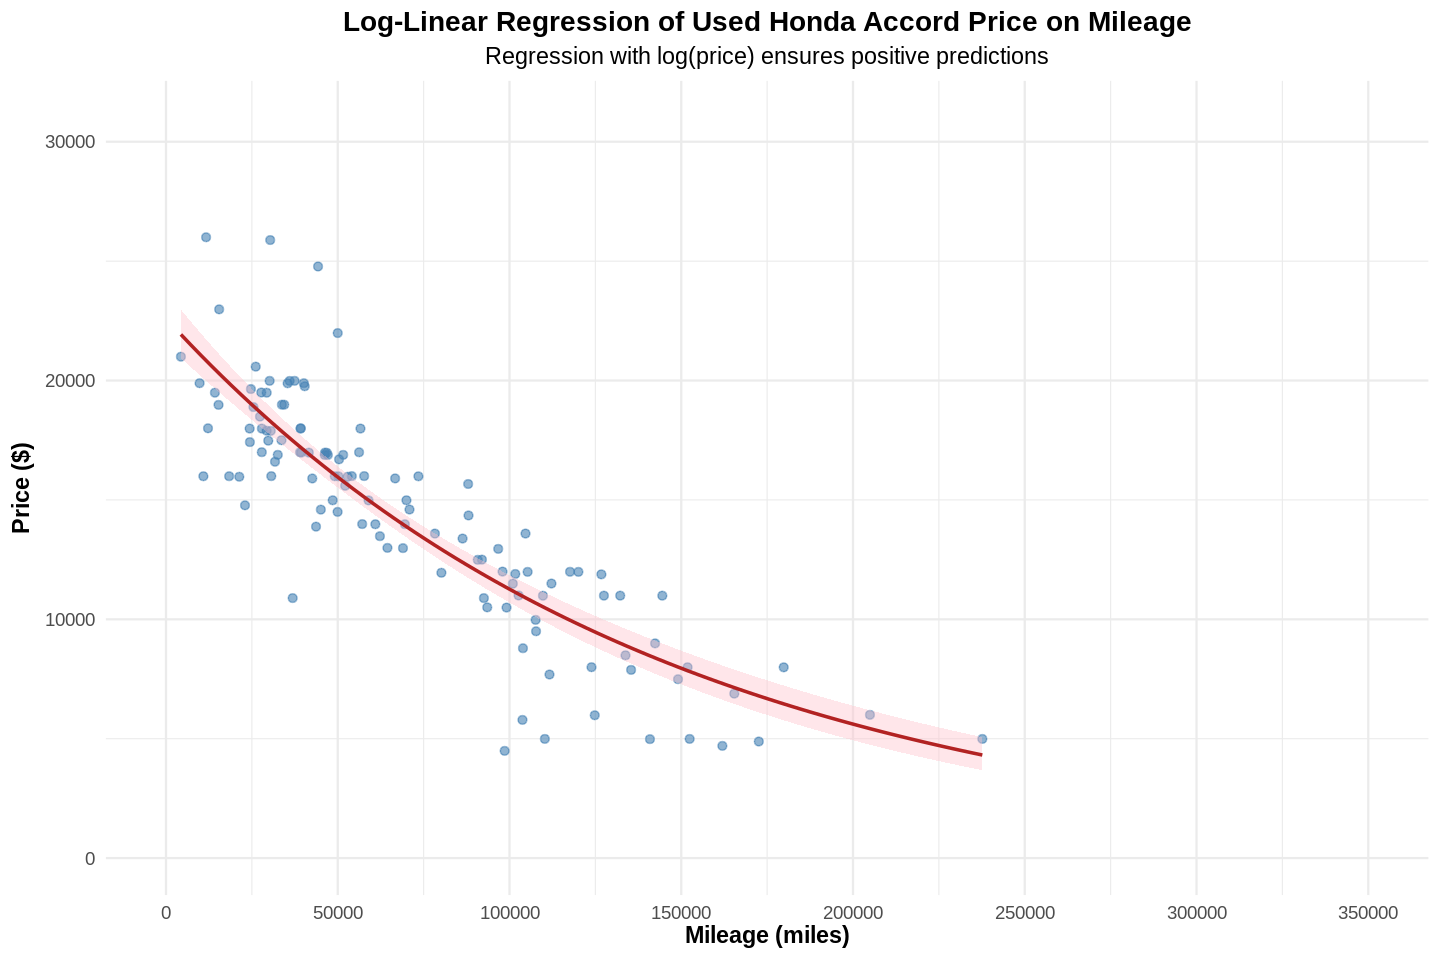

In [21]:
library(ggplot2)

ggplot(accords, aes(x = mileage, y = price)) +
  geom_point(color = "steelblue", alpha = 0.6, size = 2) +
  geom_smooth(method = "glm",
              formula = y ~ x,
              method.args = list(family = gaussian(link = "log")),
              se = TRUE,
              color = "firebrick",
              fill = "pink",
              lwd = 1) +
  scale_x_continuous(limits = c(0, 350000), breaks = seq(0, 350000, 50000)) +
  scale_y_continuous(limits = c(0, max(accords$price) + 5000)) +
  labs(
    title = "Log-Linear Regression of Used Honda Accord Price on Mileage",
    subtitle = "Regression with log(price) ensures positive predictions",
    x = "Mileage (miles)",
    y = "Price ($)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5),
    axis.title = element_text(face = "bold")
  )

## 🚀 Exercise 7

Identify and interpret the following components of your log-transformed model:

- $\exp(\hat{\beta}_0)$
- $\exp(\hat{\beta}_1)$
- $\text{R}^2$

Interpret $\exp(\hat{\beta}_1)$ in terms of **an increase in 10,000 miles**, not an increase of 1 mile.

Tip: Use the `coef` function to extract the model coefficients from your model object.

In [25]:
coefs <- coef(model_log)
exp(coefs)
summary(model_log)$r.squared

(Intercept)     mileage 
      22754           1

[1] 0.748


---

The value of $\exp(\hat{\beta}_0)$ with units: 22754.218

Interpretation: Baseline price when mileage = 0, in dollars

---

The value of $\exp(\hat{\beta}_1)$ with units: 0.999

Interpretation: Multiplicative change in expected price for each additional mile

---

The value of $\text{R}^2$ with units: 0.748

Interpretation: Fraction of variation in log(price) explained by mileage

---

## 🚀 Exercise 8

Refine your regression model from Exercise 5 to include the model year as an additional predictor. You should still use just the Honda Accord data.

In one sentence, compare the $R^2$ of the revised regression model to your model from Exercise 5.

In [26]:
model_log2 <- lm(log(price) ~ mileage + year, data = accords)
summary(model_log2)


Call:
lm(formula = log(price) ~ mileage + year, data = accords)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4336 -0.0900 -0.0130  0.0957  0.3064 

Coefficients:
                  Estimate     Std. Error t value             Pr(>|t|)    
(Intercept) -122.979520950   13.342161366   -9.22   0.0000000000000013 ***
mileage       -0.000002927    0.000000531   -5.51   0.0000002063084603 ***
year           0.066055766    0.006625906    9.97 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.149 on 119 degrees of freedom
Multiple R-squared:  0.863,	Adjusted R-squared:  0.86 
F-statistic:  374 on 2 and 119 DF,  p-value: <0.0000000000000002


---

Write your answer to Exercise 8 here.


---
Including the model year as a predictor increases R² from 0.748 to 0.863, indicating that adding year substantially improves the model’s ability to explain variation in used Honda Accord prices beyond mileage alone.

## 🚀 Exercise 9

Fit the model from Exercise 8
**the entire dataset**, not just the Honda Accords.
You'll notice that the new $R^2$ is lower than the $R^2$ from the model from Exercise 8.
In one sentence, what is the likely reason for this difference?

In [27]:
model_log_all <- lm(log(price) ~ mileage + year, data = cars)
summary(model_log_all)


Call:
lm(formula = log(price) ~ mileage + year, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6781 -0.1846  0.0327  0.2003  0.5477 

Coefficients:
                  Estimate     Std. Error t value            Pr(>|t|)    
(Intercept) -147.390831781    9.007586848   -16.4 <0.0000000000000002 ***
mileage       -0.000004102    0.000000353   -11.6 <0.0000000000000002 ***
year           0.078344037    0.004473232    17.5 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.285 on 1283 degrees of freedom
Multiple R-squared:  0.653,	Adjusted R-squared:  0.653 
F-statistic: 1.21e+03 on 2 and 1283 DF,  p-value: <0.0000000000000002


---

Write your answer to Exercise 9 here.


---
Fitting the model to the entire dataset lowers R² because including many different car makes and models introduces greater variability in prices that mileage and year alone cannot explain, reducing the proportion of variance captured by the model.

## 🚀 Exercise 10

Update the model from Exercise 9 to address the likely reason for the much smaller $R^2$.

- In this new model, what's the interpretation of the exponentiated intercept term?

- What is one change you could make to your model to make the intercept term more interpretable?

Answer in no more than three sentences.

In [28]:
model_log_all2 <- lm(log(price) ~ mileage + year + make + model, data = cars)
summary(model_log_all2)


Call:
lm(formula = log(price) ~ mileage + year + make + model, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6320 -0.0910 -0.0045  0.0853  0.7483 

Coefficients: (7 not defined because of singularities)
                     Estimate     Std. Error t value             Pr(>|t|)    
(Intercept)    -164.064825669    4.591381014  -35.73 < 0.0000000000000002 ***
mileage          -0.000003334    0.000000181  -18.45 < 0.0000000000000002 ***
year              0.086652565    0.002280537   38.00 < 0.0000000000000002 ***
makeAudi         -0.050738557    0.018743892   -2.71               0.0069 ** 
makeBMW           0.095719099    0.016738693    5.72          0.000000013 ***
makeCadillac     -0.052775232    0.019378585   -2.72               0.0066 ** 
makeHonda        -0.437729351    0.019125695  -22.89 < 0.0000000000000002 ***
makeInfiniti     -0.055480601    0.018693236   -2.97               0.0031 ** 
makeLexus         0.291852385    0.019663294   14.84 < 0.00000000000000

---

Write your answer to Exercise 10 here.


---
exp(β̂0) represents the predicted price of a car when mileage = 0, year = 0, and for the reference levels of make and model (usually the first alphabetically), which is not realistic.

Center or rescale predictors (e.g., mileage relative to 0 and year relative to a meaningful reference year), so the intercept corresponds to a realistic car (e.g., a car with 0 miles in the year 2020).

# 🚀 Exercise 11

Implement your suggested change from Exercise 10, and print the resulting model output.

What's the interpretation of the exponentiated intercept term? Answer in one sentence.

What's the interpretation of the term for the model year? Answer in one sentence.

In [29]:
cars$mileage_c <- cars$mileage - 0
cars$year_c <- cars$year - 2020

model_log_all_centered <- lm(log(price) ~ mileage_c + year_c + make + model, data = cars)

summary(model_log_all_centered)


Call:
lm(formula = log(price) ~ mileage_c + year_c + make + model, 
    data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6320 -0.0910 -0.0045  0.0853  0.7483 

Coefficients: (7 not defined because of singularities)
                   Estimate   Std. Error t value             Pr(>|t|)    
(Intercept)    10.973356038  0.022157392  495.25 < 0.0000000000000002 ***
mileage_c      -0.000003334  0.000000181  -18.45 < 0.0000000000000002 ***
year_c          0.086652565  0.002280537   38.00 < 0.0000000000000002 ***
makeAudi       -0.050738557  0.018743892   -2.71               0.0069 ** 
makeBMW         0.095719099  0.016738693    5.72          0.000000013 ***
makeCadillac   -0.052775232  0.019378585   -2.72               0.0066 ** 
makeHonda      -0.437729351  0.019125695  -22.89 < 0.0000000000000002 ***
makeInfiniti   -0.055480601  0.018693236   -2.97               0.0031 ** 
makeLexus       0.291852385  0.019663294   14.84 < 0.0000000000000002 ***
makeVolkswagen -0.539407

---

Write your answer to Exercise 11 here.


---
exp(β̂0) is the predicted price (in dollars) of a car with 0 miles in the year 2020 and for the reference make and model.

exp(β̂year) is the multiplicative change in expected price for each additional year, holding mileage and car make/model constant.